In [11]:
import pandas as pd
from sklearn.cross_validation import train_test_split
df = pd.read_csv('gbm-data.csv', index_col=None)
data = df.values

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
import math
from sklearn.metrics import log_loss

X = data[:,1:1777]
y = data[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.8, 
                                      random_state=241)
lrates = [1, 0.5, 0.3, 0.2, 0.1]
clfs = []
for lr in lrates:
    clf = GradientBoostingClassifier(n_estimators=250,verbose=True, random_state=241, learning_rate=lr)
    clf.fit(X=X_train, y=y_train)
    clfs.append(clf)

      Iter       Train Loss   Remaining Time 
         1           1.0190           32.12s
         2           0.9192           33.23s
         3           0.8272           33.10s
         4           0.7834           32.72s
         5           0.7109           32.39s
         6           0.6368           32.45s
         7           0.5797           32.35s
         8           0.5610           32.06s
         9           0.5185           31.87s
        10           0.4984           31.70s
        20           0.1999           32.64s
        30           0.1313           30.62s
        40           0.0790           28.28s
        50           0.0511           26.41s
        60           0.0352           24.76s
        70           0.0245           23.16s
        80           0.0162           21.86s
        90           0.0114           20.47s
       100           0.0077           19.10s
       200           0.0004            5.92s
      Iter       Train Loss   Remaining Time 
        

0.530439819735
36


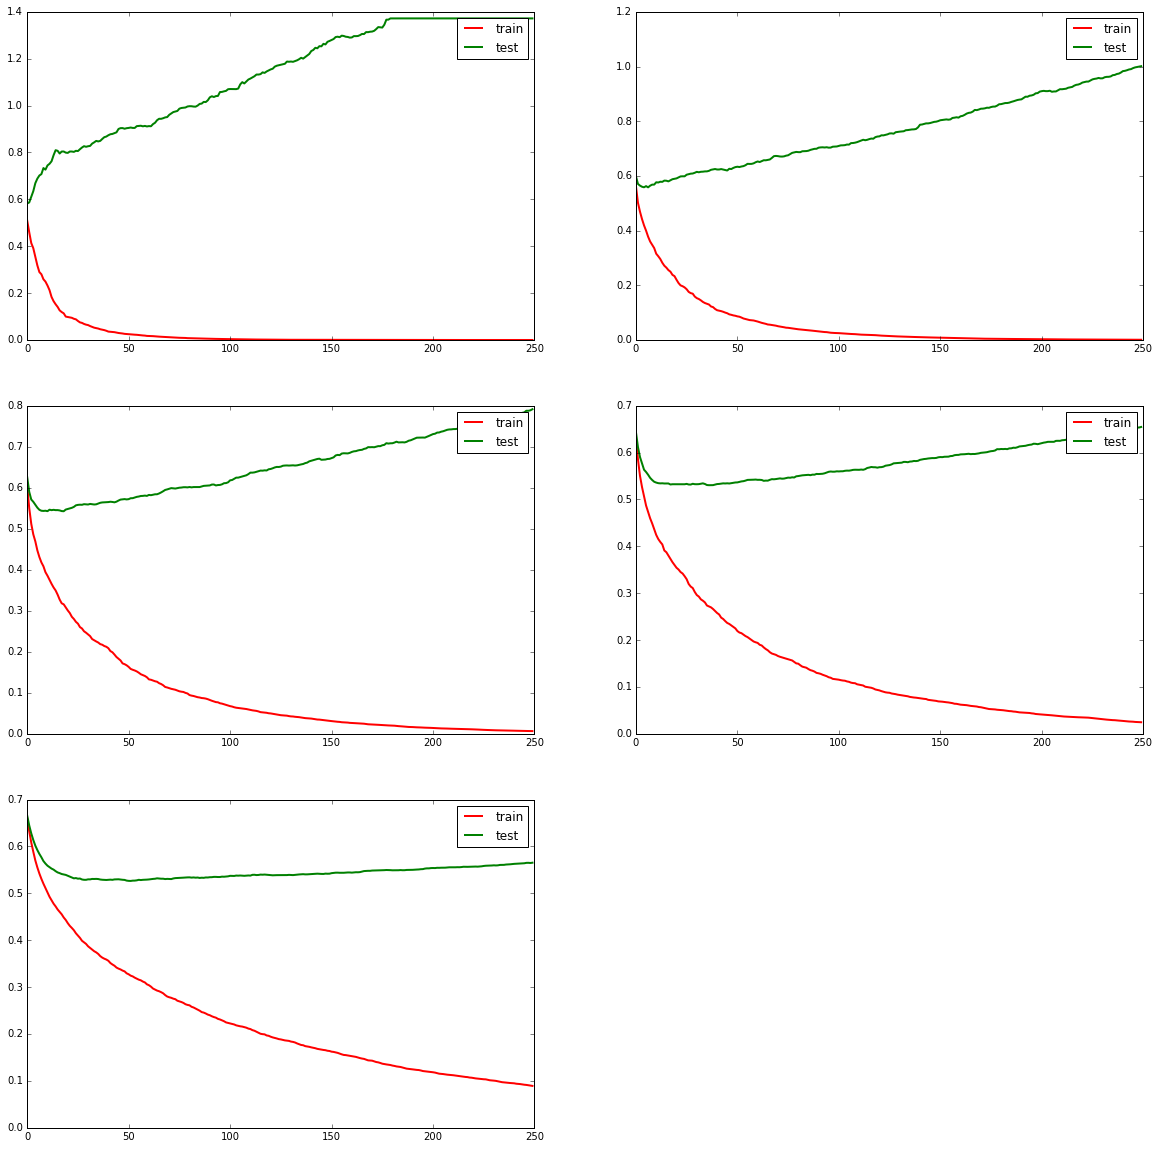

In [14]:
import matplotlib.pyplot as plt
def exp(y):
    y[:] = [1 / (1 + math.pow(math.e, -x)) for x in y]
    return y

min_test = 0
min_test_ix = 0
%matplotlib inline
fig = plt.figure(figsize=(20,20))
# fig, axes = plot.subplots(nrows=3, ncols=2, sharex=True, sharey=True)
for i in xrange(len(clfs)):
    train_score = []
    test_score = []
    clf = clfs[i]
    for k, y_pred in enumerate(clf.staged_decision_function(X_train)):
        ll = log_loss(y_train,exp(y_pred[:,0]))
        train_score.append(ll)
    for l, y_pred in enumerate(clf.staged_decision_function(X_test)):
        ll = log_loss(y_test,exp(y_pred[:,0]))
        test_score.append(ll)
    if i == 3:
        min_test = min(test_score)
        min_test_ix = test_score.index(min_test)
    
    pos = i + 1
    ax = fig.add_subplot(3,2,pos)
    ax.plot(train_score, 'r', linewidth=2)
    ax.plot(test_score, 'g', linewidth=2)
    ax.legend(['train', 'test'])
print min_test
print min_test_ix

In [35]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.8, 
                                      random_state=241)
clf = RandomForestClassifier(random_state=241, n_estimators=4000)
clf.fit(X=X_train, y=y_train)
y_pred = clf.predict_proba(X_test)[:, 1]
ll = log_loss(y_test,y_pred)
print ll

0.521472820451
